# Entity Extraction and more Text Handling

(Using NLTK and other tools)

In [2]:
%%capture
!pip install ipypublish

In [3]:
%pylab inline
from ipypublish import nb_setup
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## NLTK Book

- This is a very useful resource: https://www.nltk.org/book/.
- Read Ch0 (preface) for an overview: https://www.nltk.org/book/ch00.html. 
- Get familiar with installing specific packages within NLTK, section 2.1: https://www.nltk.org/book/ch01.html.

NLTK comes with included texts that are good for examples. 

Many of the code examples below are from the NLTK book. Please go through the early chapters in detail, as it will save a lot of time if you know all the amazing special functions that are baked into NLTK. Moreover, it gives you a lot of ideas on how computational linguistics may be used, and this will be helpful for your projects. 

In [4]:
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat') # http://faculty.nps.edu/cmartell/NPSChat.htm
nltk.download('webtext')
nltk.download('treebank')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# List the titles of the books
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
# Print the first sentence of each book
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [10]:
# List structure of the text in nltk
print(len(text4))
text4[:20]

149797


['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no']

## Word localities

- This is also known as "concordance" -- we may be interested in the text around a word. It is easy to display using NLTK. 

- In sequence to sequence models, we are often interested in the words before and after a given word, the distribution of such words forms the basis for several algorithms, e.g., text completion. 

- Training language models uses MLM = masked language modeling

- Concordance is the first attempt at seeing words in context, eventually leading to semantic understanding. Semantics is more than words, it has to do with "meaning". 



In [11]:
text2.concordance("love")

Displaying 25 of 77 matches:
priety of going , and her own tender love for all her three children determine
es ." " I believe you are right , my love ; it will be better that there shoul
 . It implies everything amiable . I love him already ." " I think you will li
sentiment of approbation inferior to love ." " You may esteem him ." " I have 
n what it was to separate esteem and love ." Mrs . Dashwood now took pains to 
oner did she perceive any symptom of love in his behaviour to Elinor , than sh
 how shall we do without her ?" " My love , it will be scarcely a separation .
ise . Edward is very amiable , and I love him tenderly . But yet -- he is not 
ll never see a man whom I can really love . I require so much ! He must have a
ry possible charm ." " Remember , my love , that you are not seventeen . It is
f I do not now . When you tell me to love him as a brother , I shall no more s
hat Colonel Brandon was very much in love with Marianne Dashwood . She rather 
e were ever animated en

## Context 

"You shall know a word by the company it keeps" (Firth, J. R. 1957:11)

https://en.wikipedia.org/wiki/John_Rupert_Firth (think of him as the father of context)

- The word appears around other words, which we call the "context". 
- We may be interested in similar words that appear in the same context, but are not part of it. 
- The context in different texts may be very different.

In [12]:
text2.similar("love")

affection sister heart mother time see town life it dear elinor
marianne me word family her him do regard head


In [13]:
text8.similar("love")

want sense


## Common context

- In NLTK, it may have been better for the function "similar" to have been called "context".
- A "common context" is the intersection of contexts for multiple words. 

In [16]:
print(text8.similar("love"))
print(" ")
print(text8.similar("sense"))
print(" ")
text8.common_contexts(["love","sense"])

want sense
None
 
love
None
 
a_of


In [17]:
print(text3.common_contexts(["love","affection"]))
print(text1.common_contexts(["love","affection"]))

('The following word(s) were not found:', 'love affection')
None
No common contexts were found
None


## Visualizing word frequencies

It is easy to examine where words occur using a dispersion plot. It shows you how many words there are in the text, the relative placement of the words, and also some visual correlation of words. 

141576


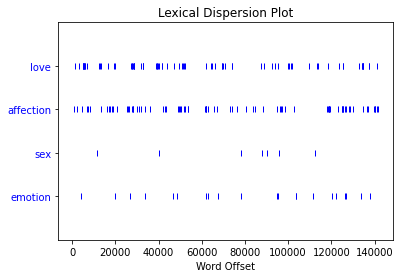

In [19]:
print(len(text2))
text2.dispersion_plot(["love","affection","sex","emotion"])

In [20]:
wrds = text8[:20]
wrds

['25',
 'SEXY',
 'MALE',
 ',',
 'seeks',
 'attrac',
 'older',
 'single',
 'lady',
 ',',
 'for',
 'discreet',
 'encounters',
 '.',
 '35YO',
 'Security',
 'Guard',
 ',',
 'seeking',
 'lady']

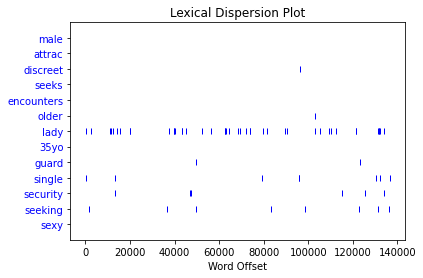

In [21]:
text2.dispersion_plot([j.lower() for j in set(wrds) if len(j)>3])

## Lexical Diversity

- Is there are wide-ranging vocabulary used, or is the writer limited in the variety of words? 
- This is computed using a simple measure of word range. 

In [22]:
def lexical_diversity(txt):
    return len(set(txt))/len(txt)

for j in range(1,10):
    print("text"+str(j),":",lexical_diversity(vars()['text'+str(j)]))

text1 : 0.07406285585022564
text2 : 0.04826383002768831
text3 : 0.06230453042623537
text4 : 0.06617622515804722
text5 : 0.13477005109975562
text6 : 0.1276595744680851
text7 : 0.12324685128531129
text8 : 0.22765564002465585
text9 : 0.0983485761345412


## Common words

- Common tokens can easily be extracted using NLTK. 
- Many of these will be "stopwords", i.e., words that are so common that they might well be removed before further analysis. Why? Because we care about words that distinguish documents from one another. 

In [23]:
FreqDist(text8)

FreqDist({'25': 6,
          'SEXY': 2,
          'MALE': 15,
          ',': 539,
          'seeks': 60,
          'attrac': 3,
          'older': 4,
          'single': 10,
          'lady': 68,
          'for': 99,
          'discreet': 7,
          'encounters': 3,
          '.': 353,
          '35YO': 1,
          'Security': 1,
          'Guard': 1,
          'seeking': 14,
          'in': 27,
          'uniform': 1,
          'fun': 28,
          'times': 15,
          '40': 16,
          'yo': 10,
          'SINGLE': 6,
          'DAD': 2,
          'sincere': 5,
          'friendly': 4,
          'DTE': 7,
          'r': 14,
          '/': 110,
          'ship': 33,
          'with': 44,
          'fem': 4,
          'age': 17,
          'open': 14,
          'S': 36,
          'E': 3,
          '44yo': 2,
          'tall': 12,
          'working': 4,
          'mum': 3,
          'or': 13,
          'below': 1,
          '45': 16,
          'fship': 11,
          'rship': 18,


In [24]:
FreqDist(text8).most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

## Bigrams

These are pairs of words that occur consecutively. 

In [25]:
txt = "The man on the horse tilted at windmills. The girl on the horse was more sensible."
list(bigrams(txt.split(" ")))

[('The', 'man'),
 ('man', 'on'),
 ('on', 'the'),
 ('the', 'horse'),
 ('horse', 'tilted'),
 ('tilted', 'at'),
 ('at', 'windmills.'),
 ('windmills.', 'The'),
 ('The', 'girl'),
 ('girl', 'on'),
 ('on', 'the'),
 ('the', 'horse'),
 ('horse', 'was'),
 ('was', 'more'),
 ('more', 'sensible.')]

## Tokenizers

In [26]:
# Tokenizers are the most useful things!
from nltk.tokenize import word_tokenize
nltk.download("punkt")

words = nltk.Text(word_tokenize(txt))
print(words)
print(type(words))
words = [w for w in words]
words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<Text: The man on the horse tilted at windmills...>
<class 'nltk.text.Text'>


['The',
 'man',
 'on',
 'the',
 'horse',
 'tilted',
 'at',
 'windmills',
 '.',
 'The',
 'girl',
 'on',
 'the',
 'horse',
 'was',
 'more',
 'sensible',
 '.']

## Collocations

These are the most frequent bigrams. 

https://www.nltk.org/howto/collocations.html

In [27]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
res = BigramCollocationFinder.from_words(words)
res.score_ngrams(bigram_measures.raw_freq)

[(('on', 'the'), 0.1111111111111111),
 (('the', 'horse'), 0.1111111111111111),
 (('.', 'The'), 0.05555555555555555),
 (('The', 'girl'), 0.05555555555555555),
 (('The', 'man'), 0.05555555555555555),
 (('at', 'windmills'), 0.05555555555555555),
 (('girl', 'on'), 0.05555555555555555),
 (('horse', 'tilted'), 0.05555555555555555),
 (('horse', 'was'), 0.05555555555555555),
 (('man', 'on'), 0.05555555555555555),
 (('more', 'sensible'), 0.05555555555555555),
 (('sensible', '.'), 0.05555555555555555),
 (('tilted', 'at'), 0.05555555555555555),
 (('was', 'more'), 0.05555555555555555),
 (('windmills', '.'), 0.05555555555555555)]

In [28]:
# Stopwords are very common words
nltk.download("stopwords")
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(len(stopWords))
stopWords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
179


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Functions Defined for NLTK's Frequency Distributions (sec 3.4)
```
fdist = FreqDist(samples)	create a frequency distribution containing given samples
fdist[sample] += 1	        increment the count for this sample
fdist['monstrous']	        count of the number of times a given sample occurred
fdist.freq('monstrous')	    frequency of a given sample
fdist.N()	                total number of samples
fdist.most_common(n)	    the n most common samples and their frequencies
for sample in fdist:	    iterate over the samples
fdist.max()	                sample with the greatest count
fdist.tabulate()	        tabulate the frequency distribution
fdist.plot()	            graphical plot of the frequency distribution
fdist.plot(cumulative=True)	cumulative plot of the frequency distribution
fdist1 |= fdist2	        update fdist1 with counts from fdist2
fdist1 < fdist2	            test if samples in fdist1 occur less frequently than in fdist2
```

In [29]:
# Character counts, useful for compression algorithms for example
# This will just use characters 
print(txt)
fd = FreqDist(txt)
fd

The man on the horse tilted at windmills. The girl on the horse was more sensible.


FreqDist({' ': 15,
          '.': 2,
          'T': 2,
          'a': 3,
          'b': 1,
          'd': 2,
          'e': 10,
          'g': 1,
          'h': 6,
          'i': 5,
          'l': 5,
          'm': 3,
          'n': 5,
          'o': 5,
          'r': 4,
          's': 6,
          't': 5,
          'w': 2})

In [35]:
print("N =",fd.N())
print('Count for a word =',fd['e'])
print("Prob for a word =",fd.freq('e'))
print("Most common words =",fd.most_common(5))

N = 82
Count for a word = 10
Prob for a word = 0.12195121951219512
Most common words = [(' ', 15), ('e', 10), ('h', 6), ('s', 6), ('n', 5)]


In [32]:
fd.tabulate()

    e  h  s  n  o  t  i  l  r  m  a  T  d  w  .  g  b 
15 10  6  6  5  5  5  5  5  4  3  3  2  2  2  2  1  1 


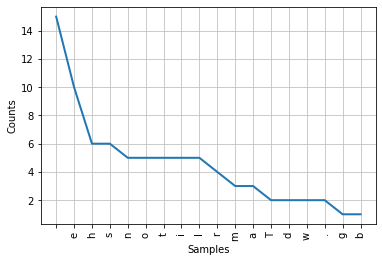

In [33]:
fd.plot()

In [38]:
toks = word_tokenize(txt)
fd = FreqDist(toks)
fd

FreqDist({'.': 2,
          'The': 2,
          'at': 1,
          'girl': 1,
          'horse': 2,
          'man': 1,
          'more': 1,
          'on': 2,
          'sensible': 1,
          'the': 2,
          'tilted': 1,
          'was': 1,
          'windmills': 1})

2


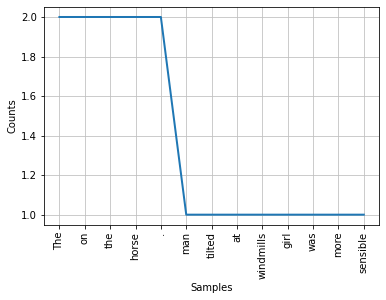

In [40]:
print(fd['horse'])
fd.plot()

## Entity Extraction

Entities are elements of the data that fall into specific pre-defined categories. They are part of the data model. For instance, when extracting financial data from the SEC, we get various entity types: companies, directors, loans, securities, products, accounting line items, etc. We need to identify these accurately when they appear in financial text. 

EE is more technically called Named Entity Recognition (NER). Other terms used are entity identification or entity extraction. We'll just call it NER. 

There are various well-known packages that provide NER:
- [NLTK](https://www.nltk.org/) (which we are familiar with) 
- General Architecture for Text Engineering [GATE](https://gate.ac.uk/).
- Stanford Named Entity Recognizer, [SNER](https://nlp.stanford.edu/software/CRF-NER.shtml)
- [spaCy](https://spacy.io/) (we will see more below)
- [GluonNLP](https://gluon-nlp.mxnet.io/model_zoo/ner/index.html), NER with BERT, it uses a language model that is bidirectional, i.e., keeps track of conditional probabilities of forward and backward sequences of words. 
- [AWS Comprehend NER](https://docs.aws.amazon.com/comprehend/latest/dg/get-started-api-entities.html). There is a Python SDK for this. [Comprehend documentation](https://docs.aws.amazon.com/comprehend/index.html). 

## NER/RE

- The whole point of NER is to begin the process of **understanding** what the text we are using is all about. 
- It starts from the composition of the text, i.e., the entities, and then moves on to finding **relationships** between the entities. 
- While there are many definitions of **knowledge**, a narrow one is entities plus relationships. For example, the sentence "Amazon ships PPE" has two entities, "Amazon" and "PPE" (the subject and object of the sentence) and the relationship is given by the word "ships". 

Let's look at a slightly more elaborate sentence below and use it to run some examples. 

In [41]:
text = 'A new statement from Boeing indicates that the aerospace manufacturer knew about a problem with the 737 Max aircraft well before the deadly October 2018 Lion Air crash, but decided not to do anything about it.'
print(text)

A new statement from Boeing indicates that the aerospace manufacturer knew about a problem with the 737 Max aircraft well before the deadly October 2018 Lion Air crash, but decided not to do anything about it.


## Parts of Speech (POS)

We may want to tag the entities in text as parts of speech. The POS category of a word may be useful in determining relationships. 

We learnt this in school: 
- nouns (person, place, thing, other than a pronoun)
- verbs (action, state, occurrence)
- adjectives (modifying a noun)
- adverbs (modifying a verb, e.g., exercised vigorously)
- prepositions (relating other words to nouns or pronouns, e.g., the man *in* the mask)
- pronouns (takes the place of a noun, e.g., they, he, she, it)

You can read more about this linguistics-related approach: https://en.wikipedia.org/wiki/Part-of-speech_tagging. Note that POS tagging (POST) is non-trivial and requires writing rules for the English language (or any other language) and is therefore not language agnostic. 

Let's try this using NLTK. Master List of Tags: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

txt = nltk.word_tokenize(text)
txt = nltk.pos_tag(txt)
txt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('A', 'DT'),
 ('new', 'JJ'),
 ('statement', 'NN'),
 ('from', 'IN'),
 ('Boeing', 'NNP'),
 ('indicates', 'VBZ'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('aerospace', 'NN'),
 ('manufacturer', 'NN'),
 ('knew', 'VBD'),
 ('about', 'IN'),
 ('a', 'DT'),
 ('problem', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('737', 'CD'),
 ('Max', 'NNP'),
 ('aircraft', 'NN'),
 ('well', 'RB'),
 ('before', 'IN'),
 ('the', 'DT'),
 ('deadly', 'JJ'),
 ('October', 'NNP'),
 ('2018', 'CD'),
 ('Lion', 'NNP'),
 ('Air', 'NNP'),
 ('crash', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('decided', 'VBD'),
 ('not', 'RB'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('anything', 'NN'),
 ('about', 'IN'),
 ('it', 'PRP'),
 ('.', '.')]

In [43]:
# Noun phrase = optional determinor (DT), followed by any of adjectives (JJ), 
# and ending in a noun (NN). 
pattern = 'NP: {<DT>?<JJ>*<NN>}'  
pp = nltk.RegexpParser(pattern)
print(pp)
txt_parsed = pp.parse(txt)
print(txt_parsed)


chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<DT>?<JJ>*<NN>'>
(S
  (NP A/DT new/JJ statement/NN)
  from/IN
  Boeing/NNP
  indicates/VBZ
  that/IN
  (NP the/DT aerospace/NN)
  (NP manufacturer/NN)
  knew/VBD
  about/IN
  (NP a/DT problem/NN)
  with/IN
  the/DT
  737/CD
  Max/NNP
  (NP aircraft/NN)
  well/RB
  before/IN
  the/DT
  deadly/JJ
  October/NNP
  2018/CD
  Lion/NNP
  Air/NNP
  (NP crash/NN)
  ,/,
  but/CC
  decided/VBD
  not/RB
  to/TO
  do/VB
  (NP anything/NN)
  about/IN
  it/PRP
  ./.)


## Using spaCy

spaCy is an industrial strength, open-source NLP package and has several useful functions. Take some time to go over the website and documentation to get a good idea of the vast functionality therein. 

https://spacy.io/

https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

https://medium.com/swlh/python-nlp-tutorial-information-extraction-and-knowledge-graphs-43a2a4c4556c

One of the interesting developments in NLP is the curation of "language models". A language model may be thought of as a *statistical distribution over a sequence of words*. This means that it contains the following (and more) components:
- Unconditional distribution of words and word sequences. 
- Conditional distributions of words and word sequences. 
- Choices of unigrams, bigrams, $n$-grams.
- Sequence length choices. 

In the next code block, we will import an English language model, we can get many models, small and large  [spaCy language models](https://spacy.io/models). Q: What are the various applications we may use language models for? (POST is just one such application. Others are content classification, recommender systems, search algorithms, customer support routing, extracting entities from research like PubMed for Covid-19 analysis, etc.)

In [44]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [45]:
#Code from the spaCy web site
import spacy

# Language Model
# Load English tokenizer, tagger, parser, NER and word vectors
#If not working: python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")
#If not working: python -m spacy download en
nlp = spacy.load("en")

In [46]:
# Process the text above
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
print('----Named Entities----')
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['A new statement', 'Boeing', 'the aerospace manufacturer', 'a problem', 'the 737 Max aircraft', 'the deadly October 2018 Lion Air crash', 'anything', 'it']
Verbs: ['indicate', 'know', 'decide']
----Named Entities----
Boeing ORG
737 PRODUCT
October 2018 DATE
Lion Air ORG


## How is Entity Extraction done? 

1. Linguistic rules. Here we write hundreds of rules to decide whether a word is an entity or not. You may decide to do this and it would be a test of your regex skills. This is the domain of computational linguistics. This approach is not language agnostic, nor is it domain agnostic.  

2. Lexical methods. This is a word-based approach and requires a collection of words that are entities in a given domain, i.e., a **lexicon**. For example, in finance, words like asset, profit, director, company, etc., may be part of the lexicon. We may think of lexicons as domain-specific word lists. When we group the words in a lexicon into categories, we get an **ontology**. An ontology is a bigger concept than just categories, it also contains relationships. From the dictionary: "a set of concepts and categories in a subject area or domain that shows their properties and the relations between them." Lexical NER is accurate and fast, but it is not comprehensive. Entities not in the ontology are not captured. 

3. Machine-learning methods. The modern approach is not to write the algorithm for NER but to let the machine learn the algorithm from examples. For this we need a tagged dataset and the more domain specific this is, the better. We may also want to have examples of what an entity is not, i.e., for example, above, BOEING was tagged as an ORG, but we may increment the data with another example where we say that BOEING is not a PRODUCT. We may have an additional label for BOEING called a BRAND. Machine learning methods can be both language and domain agnostic. 

These methods may not just be used standalone but may be combined to result in better methods. 

In [47]:
# Visualize NER
from spacy import displacy
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [48]:
displacy.render(doc, style='dep', jupyter=True, options={'distance':150})

## Steps in NER

Build an ontology. Ontologies may be represented as knowledge bases/graphs. Then link an entity to an ontology entity (node in the graph). This process can be separated into three main components: extraction, search, disambiguation:

1. Extraction. Extraction is the detection and preparation of named entity mentions. Uses tokenization, sentence detection, POS (part of speech) tagging, tokenisation, capitalization rules, and in-document [coreference resolution](https://nlp.stanford.edu/projects/coref.shtml). 

2. Search. Find all possible entities in the ontology that may be a match for the entity in the text. The idea is to get a small set of classes. 

3. Disambiguation. Choose from among the candidate classes the one that is most likely, i.e., the best one.  

Good NER trades off precision (keep false positives low) and recall (keep false negatives low). 


## Using AWS Comprehend

https://docs.aws.amazon.com/comprehend/latest/dg/get-started-api-entities.html

1. Use the AWS Console to try out Comprehend. 
2. Use an API

To use Comprehend, we need to enable access to it. Click on the "IAM role ARN" link in the notebook instance, then click "Attach Policies" then choose "Comprehend FullAccess"

In [ ]:
!aws --version

Edit the file ~/.aws/config to add the lines for the ACCESS KEY and SECRET KEY using your IAM --> User --> Security Credentals

You will need two files, `config` and `credentials`

`config`:

```
[default]
region = us-east-2
```

`credentials`: 

```
[default]
aws_access_key_id = AKIAQUH5WUITYGXGUFCUI
aws_secret_access_key = rrUGc8hpIM2CcbESou/8jLLdT0dr67V5g57cGoTQ
```

Then run `aws configure` (and hit Enter everytime)

In [ ]:
!aws comprehend detect-entities --language-code "en" --text 'A new statement from Boeing indicates that the aerospace manufacturer knew about a problem with the 737 Max aircraft well before the deadly October 2018 Lion Air crash, but decided not to do anything about it.'